In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score

# Loading dataset

In [62]:
df=pd.read_csv('train_loan.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
df=df.drop(columns=['Loan_ID'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Preprocessing the dataset

In [64]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [66]:
#fill nulls for categorical attributes
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [67]:
#fill nulls for numerical attributes
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [68]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

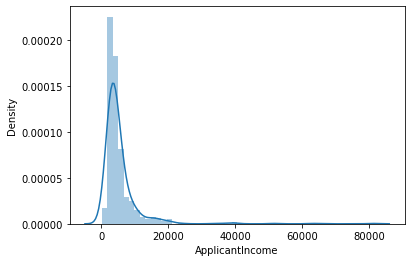

In [69]:
#visualize numerical attributes
sns.distplot(df['ApplicantIncome'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

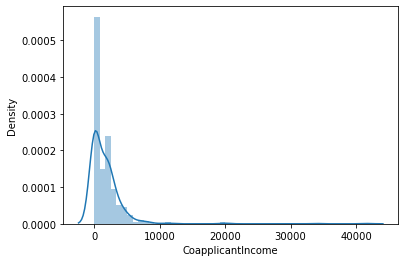

In [70]:
sns.distplot(df['CoapplicantIncome'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

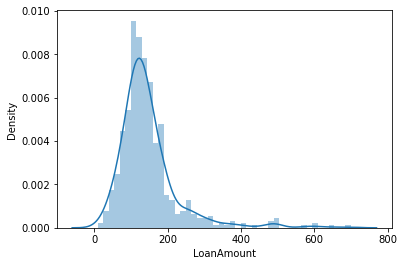

In [71]:
sns.distplot(df['LoanAmount'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

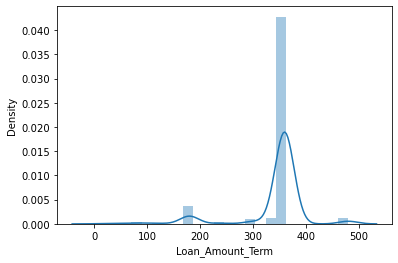

In [72]:
sns.distplot(df['Loan_Amount_Term'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

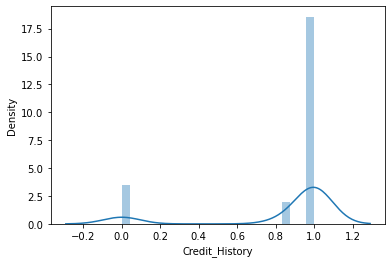

In [73]:
sns.distplot(df['Credit_History'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

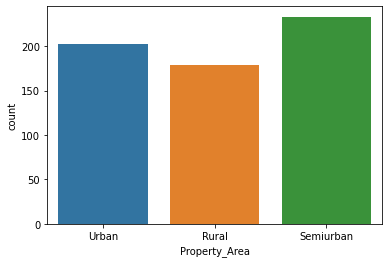

In [74]:
#visualize categorical data
sns.countplot(df['Property_Area'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

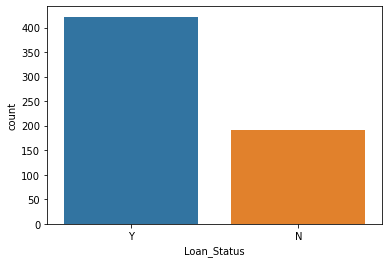

In [75]:
sns.countplot(df['Loan_Status'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

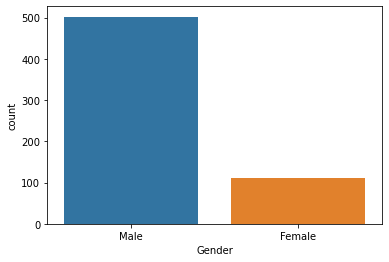

In [76]:
sns.countplot(df['Gender'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

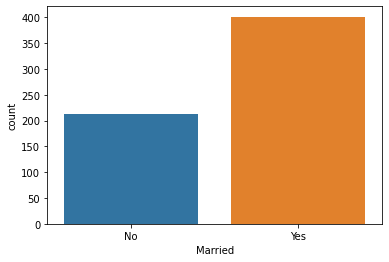

In [77]:
sns.countplot(df['Married'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

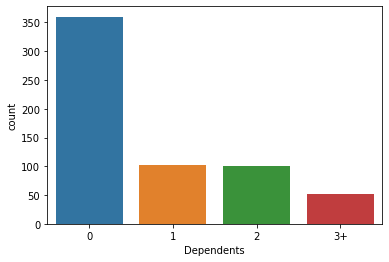

In [78]:
sns.countplot(df['Dependents'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

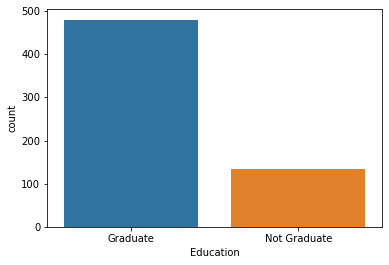

In [79]:
sns.countplot(df['Education'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

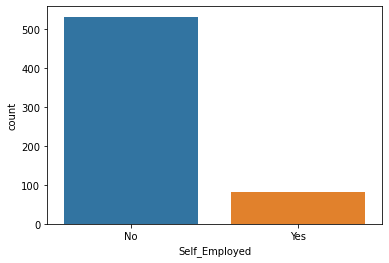

In [80]:
sns.countplot(df['Self_Employed'])

In [81]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


#  Log Transform

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

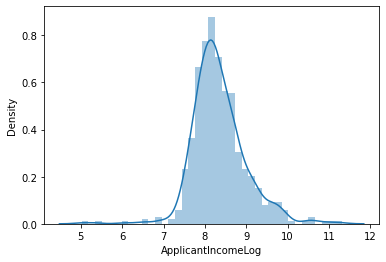

In [82]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomeLog'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

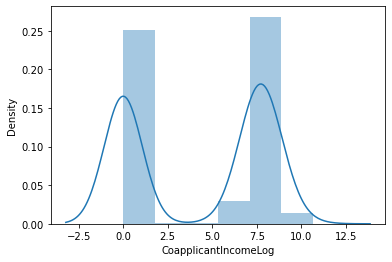

In [83]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

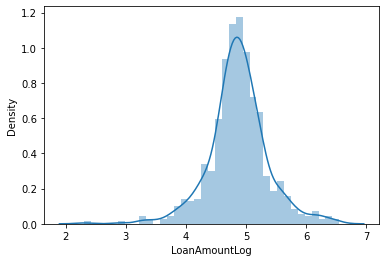

In [84]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

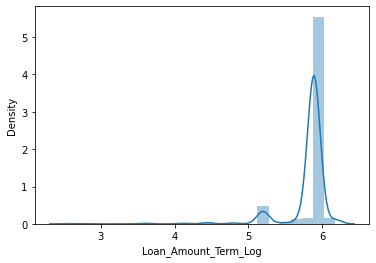

In [85]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History_Log', ylabel='Density'>

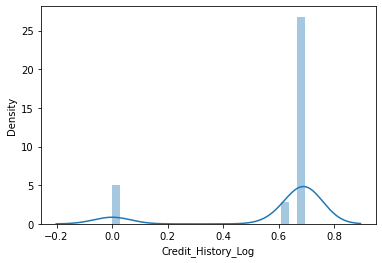

In [86]:
df['Credit_History_Log'] = np.log(df['Credit_History']+1)
sns.distplot(df["Credit_History_Log"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncomeLog', ylabel='Density'>

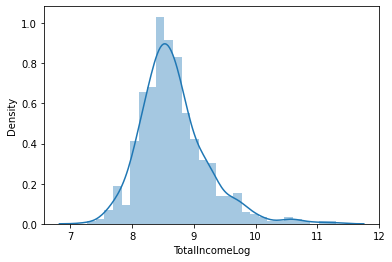

In [87]:
df['TotalIncomeLog'] = np.log(df['TotalIncome']+1)
sns.distplot(df["TotalIncomeLog"])

In [88]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


In [89]:
cols=['ApplicantIncome','CoapplicantIncome']
df=df.drop(columns=cols)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


#  Correlation matrix

<AxesSubplot:>

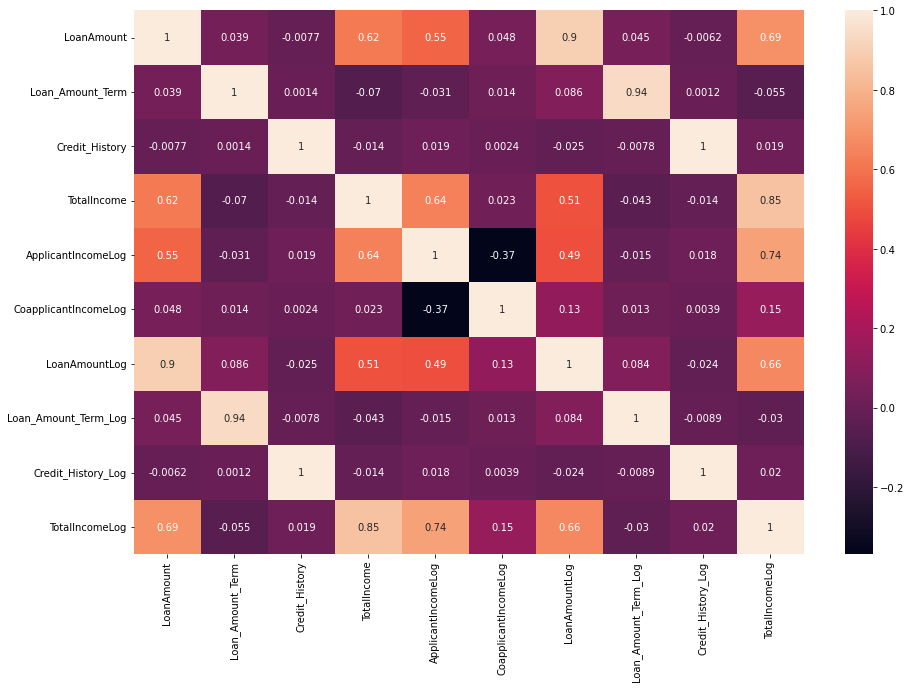

In [90]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

# Label_Encoding

In [91]:
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le=LabelEncoder()
for c in cols:
    df[c]=le.fit_transform(df[c])

In [92]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


# Train_Test_Split

In [93]:
X=df.drop(columns=['Loan_Status'])
Y=df['Loan_Status']

In [94]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog
0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1.0,0,2900.0,7.972811,0.000000,4.276666,5.888878,0.693147,7.972811
610,1,1,3,0,0,40.000000,180.0,1.0,0,4106.0,8.320448,0.000000,3.713572,5.198497,0.693147,8.320448
611,1,1,1,0,0,253.000000,360.0,1.0,2,8312.0,8.996280,5.484797,5.537334,5.888878,0.693147,9.025576
612,1,1,2,0,0,187.000000,360.0,1.0,2,7583.0,8.933796,0.000000,5.236442,5.888878,0.693147,8.933796


In [95]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [96]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,random_state=0,test_size=0.3)

# Model_training and testing

In [117]:
def model_Train(model,x,y):
  model = model
  model.fit(x,y)
  yp=model.predict(x)
  from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
  cm = confusion_matrix(y, yp)
  sns.heatmap(cm,annot=True)
    
  accuracy = accuracy_score(y,yp)*100
  print('Training Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

  recall = recall_score(y,yp, labels=[1,2], average='micro')
  print('Train_Recall: %.3f' % recall)

  precision = precision_score(y,yp, labels=[1,2], average='micro')
  print('Train_Precision: %.3f' % precision)

  score = f1_score(y,yp, labels=[1,2], average='micro')
  print('Train_F1-Measure: %.3f' % score)


In [118]:
def model_Test(model,x,y_test):
  model = model
  model.fit(x,y_test)
  y_pred = model.predict(x)

  from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm,annot=True)

  accuracy = accuracy_score(y_test, y_pred)*100
  print('Testing Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

  recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
  print('Recall: %.3f' % recall)

  precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
  print('Precision: %.3f' % precision)

  score = f1_score(y_test, y_pred, labels=[1,2], average='micro')
  print('F1-Measure: %.3f' % score)

Training Accuracy of our model is equal 80.19 %.
Train_Recall: 0.983
Train_Precision: 0.780
Train_F1-Measure: 0.869


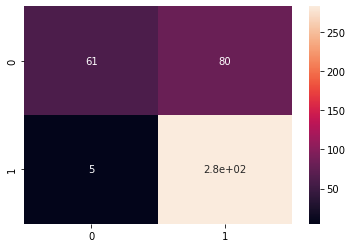

In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 82.16 %.
Recall: 0.978
Precision: 0.814
F1-Measure: 0.888


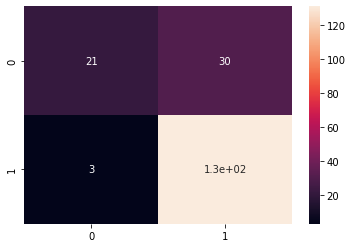

In [120]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 73.19 %.
Train_Recall: 0.920
Train_Precision: 0.742
Train_F1-Measure: 0.822


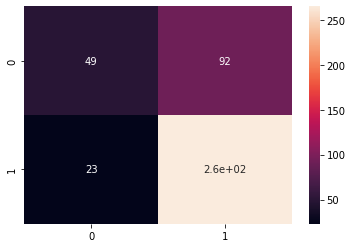

In [121]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 77.3 %.
Recall: 0.978
Precision: 0.771
F1-Measure: 0.862


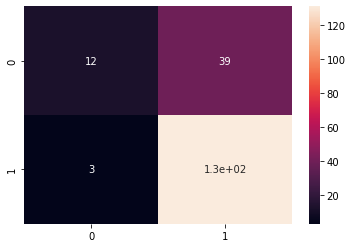

In [122]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 100.0 %.
Train_Recall: 1.000
Train_Precision: 1.000
Train_F1-Measure: 1.000


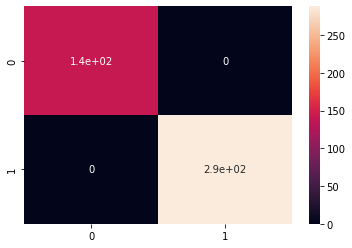

In [123]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 100.0 %.
Recall: 1.000
Precision: 1.000
F1-Measure: 1.000


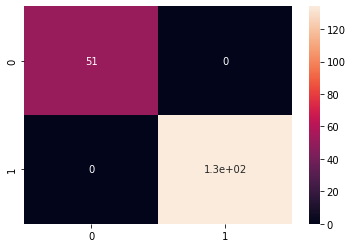

In [124]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 100.0 %.
Train_Recall: 1.000
Train_Precision: 1.000
Train_F1-Measure: 1.000


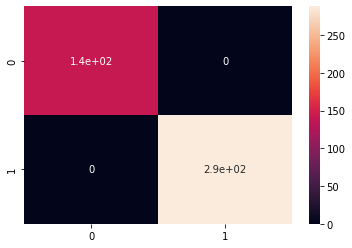

In [129]:
model=ExtraTreesClassifier()
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 100.0 %.
Recall: 1.000
Precision: 1.000
F1-Measure: 1.000


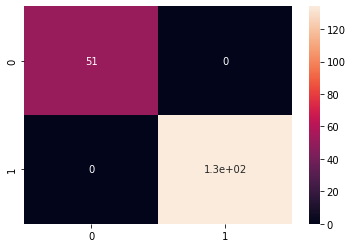

In [130]:
model_Test(model,x_test,y_test)

# Hyper_parameter Tuning

Training Accuracy of our model is equal 82.52 %.
Train_Recall: 0.983
Train_Precision: 0.802
Train_F1-Measure: 0.883


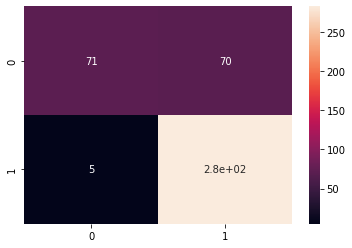

In [131]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=25, max_depth=7, max_features=1)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 85.41 %.
Recall: 0.985
Precision: 0.841
F1-Measure: 0.907


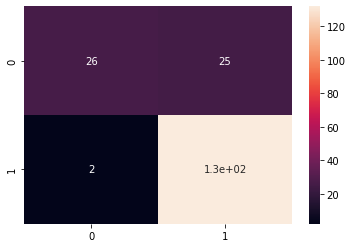

In [132]:
model_Test(model,x_test,y_test)